In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 3-state Markov jump process

In [3]:
# rate matrix
Q = np.array([[-2,1,1],[1,-1,0],[2,1,-3]])
Q

array([[-2,  1,  1],
       [ 1, -1,  0],
       [ 2,  1, -3]])

In [4]:
# jump matrix
P = Q-np.diag(np.diag(Q))
P = P/np.sum(P,axis=1)[:,np.newaxis]
P

array([[0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ]])

In [7]:
N_jumps = 20

jumptimes = np.zeros(N_jumps)
jumptimes[0] = 0
jumploc = np.zeros(N_jumps)
jumploc[0] = 0 #start location in 1

for i in range(1,N_jumps):
    st = int(jumploc[i-1]) #current state
    waitingtime = np.random.exponential(-1/np.diag(Q)[st])
    jumptimes[i]=jumptimes[i-1] + waitingtime
    choosestate = np.random.choice(np.arange(3), p=P[st])
    jumploc[i] = choosestate.copy()

jumploc +=1 # to change states 0-2 to 1-3

Text(0, 0.5, '$X_t$')

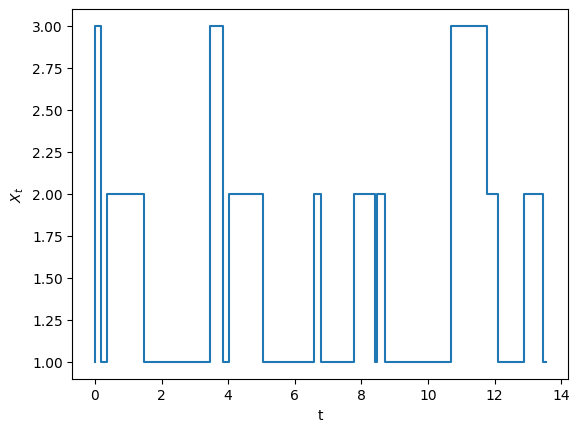

In [8]:
plt.step(jumptimes, jumploc)
plt.xlabel('t')
plt.ylabel('$X_t$')